Name: Yuncheng Liang   
Date: 5/29/2021

# INTRODUCTION

> **Bellabeat**: a high-tech manufacturer of **health-focused products** for **women**  
> **Goal**: focus on a Bellabeat product and analyze smart device usage data in order to gain insight into **how people are already using their smart devices**. Then, using this information, she would like high-level recommendations for **how these trends can inform Bellabeat marketing strategy**.
> 
> Summaries the goal to questions below:
> 1. What are some trends in smart device usage?
> 2. How could these trends apply to Bellabeat customers?
> 3. How could these trends help influence Bellabeat marketing strategy?


# ASK

> **key stakeholders**:      
**Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer;   
**Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team;    
**Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. 
> 
> **The business task**:   
> The business task is to identify the consumers’ product usage trend through data already been collected and exploit the trend to create potential marketing strategies which result in more sells of bellabeat products.

# PREPARE
**data sources**:    
> 1.public dataset on kaggle: **FitBit Fitness Tracker Data** [https://www.kaggle.com/arashnic/fitbit](http://)  
These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between **04.12.2016-05.12.2016**. **Thirty eligible Fitbit users** consented to the submission of personal tracker data, including **minute-level output for physical activity, heart rate, and sleep monitoring**. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

> 2.The best complimentary data source would come from the Bellabeat company itself.   
First, we need to know **whether Bellabeat company record their user data or not from mobile apps and to which level of details** (just to the level of user register info or to the level of specific logs recording heart rate per minute .    
It would be the best if user data is recorded in details, **but if not**, and under the scenario which **time is not urgent**, Bellabeat company could detailed **explain the purpose for data collection and ask their users for permission** of using their data recorded in Bellabeat’s mobile app of length as long as possible,at best a year for recognizable seasonal pattern.   
If the **correspondence rate is low**, certain reward scheme like free membership could be applied to **motivate users to participate in submitting data** (but do avoid repetitious participation).


**Guiding questions**: 

> ● **Where is your data stored?**   
> 
> Kaggle data: Local disk and public available datasets on Kaggle   
> Bellabeat data: if stored, company’s private database     
> 
> ● **How is the data organized? Is it in long or wide format?**
> 
> Kaggle data: 1 month data from 2016/4/12 to 2016 5/12, Long format with many sheets     
> 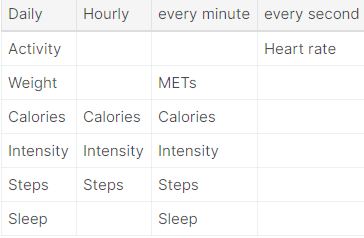
> 
> Bellabeat data: the most recent year ‘s data, long format    
> 
> ● **Are there issues with bias or credibility in this data? Does your data ROCCC?**      
> 
> Kaggle data: 
> Since bellabeat is **created for and used by women only**, our target of smart devise users should also be women, which is likely not true for the dataset given. This dataset obviously doesn’t record menstrual cycles.   
> The **second concern is the sample size**. Out of the population of potentially millions of users of smart devices across the globe, a sample size of 30 is **too small to be representative**.    
> Not to mention the **time scope limitation** (only one month in spring) made us not be able to trace year-round changes and patterns in user health condition and behaviors.   
> 
> Bellabeat data: no bias and credibility for our **first-party data source**    
> 
> ● **How are you addressing licensing, privacy, security, and accessibility?**
> 
> Kaggle data: As for a free and open public dataset provided on Kaggle, just list the source when using is enough for all the concerns. 
> 
> Bellabeat data:    
> **For licensing**, mobile app users are **supposed to know and agree on the terms** regarding the licensing, privacy, security, and accessibility **at the first time they use the app**.  
> 
> **For privacy and security**, the company should ensure the data exclusive **for internal use only** and be careful of potential data leakage.    
> **For accessibility**, the company should **only empower employees who need to use the user data for their work** but not everyone.   
> 
> ● **How did you verify the data’s integrity?**
> 
> Kaggle data: **low integrity** due to the fact that it comes from a **third party provider** (Amazon Mechanical Turk), with **limited time scope**(one month), **small sample size**(30 people) and **unrecognizable overlap with Bellabeat's customer base** since user gender is not specified.   
> 
> Bellabeat data: first-party data collected by the company itself is credible.

**Since Bellabeat's user data which would be available for a real-life collaborative analysis is not available for our current simulated case study. Only FitBit Fitness Tracker Data on kaggle is used for this project. And the business objective has to be adjusted to study general fitbit users' characteristics and their usage of the device within each day for a typical month.**

# PROCESS AND ANALYZE   

 **Assumption and premise**:   
>  **the calories burned (minutely,hourly,daily) measured by the fitbit could be considered as an accurate reflection of a  user's active level.**          
 
 **Look for**:     
> 1. part1: observing the correlation between total calories burned in a day and total steps taken.    
part2: monitoring users' active level/metabolism (measured by total calories burned in a day) and total steps taken during each day of the week .    
> 2. correlation analysis between users' active level/metabolism (measured by total calories burned in a day) and his/her sleep quality (total minutes asleep/total time in bed). An important detail should pay attention to is that the sleep and daily calories burned should be measured in the same day so that we can observe the effect of sleep (typically with the largest portion occurs from 00:00 at night till 07:00 in the morning) upon user's active level/metabolism at that day.   
> 3. users' behavior analysis through comparsion of calories burned each hour during workdays and weekends.
> 4. anomaly detection for strange heart rate appearance during sleep 

**Above steps require huge amount work in data cleaning, change logs are documented for each study below**:

**Study 1 change log**:   
1. open worksheet dailyCalories_merged.csv, import it into mysql by changing the column "ActivityDay" type to date, then use following sql query to export the new worksheet dailyCalories_final.csv   
> USE casestudy;   
> SELECT *   
> FROM dailycalories_merged;   
> SELECT 'Id', 'ActivityDay', 'Calories'   
> UNION ALL     
> SELECT Id, ActivityDay, Calories FROM dailycalories_merged     
> INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/dailycalories_final.csv'       
> Fields TERMINATED BY ','      
> LINES TERMINATED BY '\r\n';     
2. open it in excel nd change the column "ActivityDay" format to day in a week.
3. look at the "calories" range (0-4900), remove strange value, like calories less than 500(a normal person's baseline calorie burned due to metabolisim has to be greater than 500 even if he/she doesn't move at all)       
4. using countif to find out total there are 9 days with calories less than 500, using conditional formating to hightlight these cells and delete their rows 5. using flashfill to recreate a column with cell value documenting the day in a week corresponding to "ActivityDay", name it "DayInWeek"   
6. create a pivot table with "DayInWeek" and "Calories"   
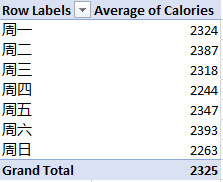   
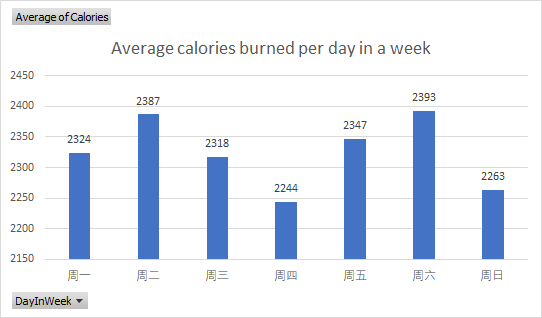
7. Similiar steps of transformation are applied to dailySteps_merged.csv as detailed in step 1,2,5 and 6, but "StepTotal" should not drop values even if it equals to 0 because it is possible for a person to stay at home and not moving for a whole day.   
8. results are summarised in pivot table   
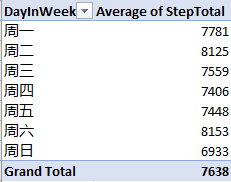   
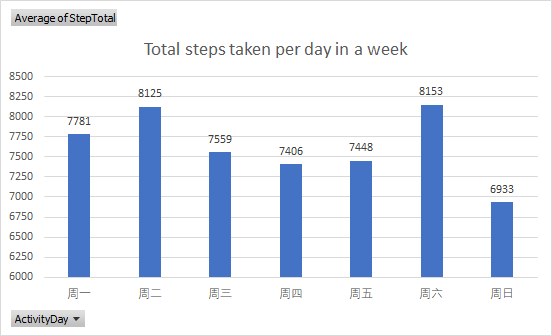


**Study 2 change log**:
1. open worksheet sleepDay_merged.csv in excel, create column "SleepQuality" which equals to "TotalMinutesAsleep" divided by "TotalTimeInBed", delete all columns except "Id", "SleepDay","TotalMinutesAsleep" and "SleepQuality".    
2. use text-to-column to transform SleepDay to date only, delete unnecessary time portion of the original column.    
3. rename the file as sleepDay_final.csv and then import it into mysql by changing the column "SleepDay" type to date, then connect to tableau for furthur analysis with another table dailyCalories_final.csv which is already prepared.   


**Study 3 change log**:   
1. open worksheet hourlyCalories_merged.csv, use text-to-column function to split the "ActivityDay" into date and time and am/pm, name the date colmn to "ActivityDay", then concat time and am/pm column to create a new "Hour" column (=concat(text(E2,"hh:mm"),F2)).    
2. import selected columns into mysql for transforming the "ActivityDay" column to the type "Date", then export back as a new csv file hourlyCalories_final.csv.   
> USE casestudy;   
> SELECT *   
> FROM hourlycalories;   
> SELECT 'Id', 'Calories', 'ActivityDay', 'Hour'   
> UNION ALL     
> SELECT Id, Calories, ActivityDay, `Hour` FROM hourlycalories     
> INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/hourlycalories_final.csv'       
> Fields TERMINATED BY ','    
> LINES TERMINATED BY '\r\n';   
3. format the "ActivityDay" to show the day in a week, create a pivot table using columns "Id","ActivityDay","Hour" and "Calories".      
4. drag "Hour" in "Rows" field, drag "Calories" in "Values" field and set it to Average value, drag "ActivityDay" to "Columns" field.   
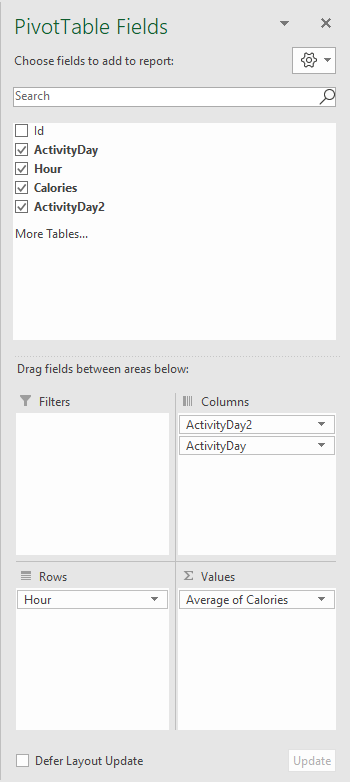
5. Group Monday till Friday as Workdays, Saturday and Sunday as Weekends   
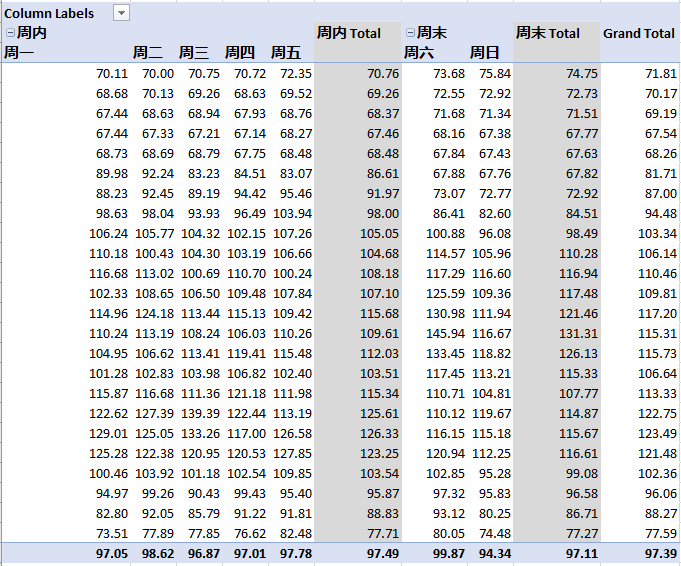    
6. copy and paste the hour in a day, the hourly average calories burned on workdays and on weekends into new cell and create a line graph with up and down bars.   
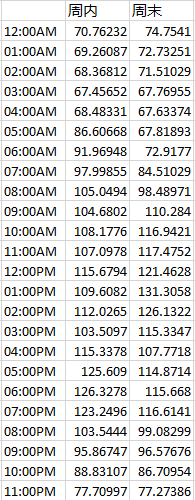   
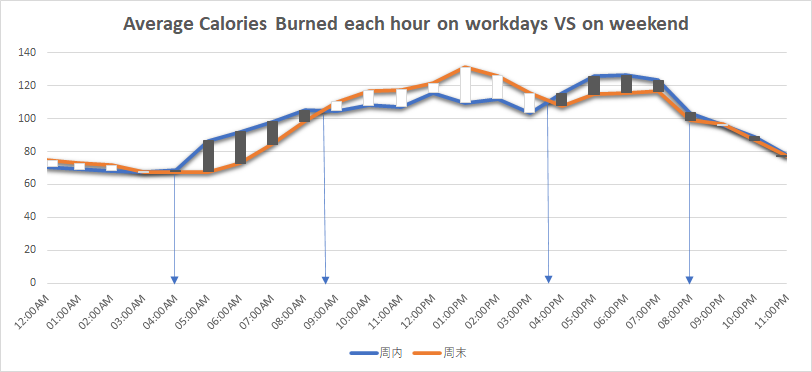
7. format and customize the grapgh, proceed to next step of analysis   


**Study 4 change log**:   
1. open minutesSleep_merged.csv, import "Id" and  "date" column into mysql    
2. import heartrate_seconds_merged.csv to mysql as well, group by "Id" and the date, hour and minute extracted from "Time" column in order to calculate minute average of heart rates.   
3. similiarly, extract the date, hour and minute from "date" column in table "minutesSleep_merged", which will be used for joining two tables together later.   
4. join table "sleep" and "heart_rate" by user's Id and the time at sleep (specific to the exact minute).    
4. follow the below sql code, export the file as sleep_heart_rate.csv.   
> USE casestudy;
> 
> CREATE TABLE heart_rate 
> AS
> SELECT Id, `time`, ROUND(AVG(`VALUE`),1) hear_rate_per_minute 
> FROM (SELECT Id, date_format(`time`,"%m-%d %H:%i") as `time`, `Value`
> FROM heartrate_seconds_merged) A 
> GROUP BY Id, `time`;
> 
> CREATE TABLE sleep
> AS
> SELECT Id, date_format(`date`,"%m-%d %H:%i") as sleeptime 
> FROM minutesleep_merged;
> 
> CREATE TABLE sleep_heart_rate
> AS
> (SELECT M.Id, M.sleeptime, hear_rate_per_minute
> FROM heart_rate H INNER JOIN sleep M 
> ON (M.Id=H.Id and M.sleeptime=H.`time`));
> 
> SELECT * FROM sleep_heart_rate ORDER BY Id,sleeptime;
> 
> SELECT 'Id', 'sleeptime', 'heart_rate_per_minute'
> UNION ALL  
> SELECT * FROM sleep_heart_rate ORDER BY Id,sleeptime  
> INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/sleep_heart_rate.csv'     
> Fields TERMINATED BY ','   
> LINES TERMINATED BY '\r\n';  
>
5. take the data to tableau for furthur analysis   
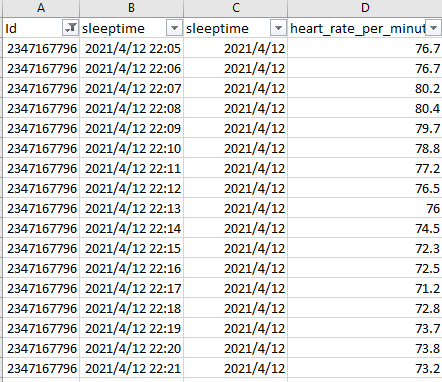    

# Study 1 analysis

# PART1    

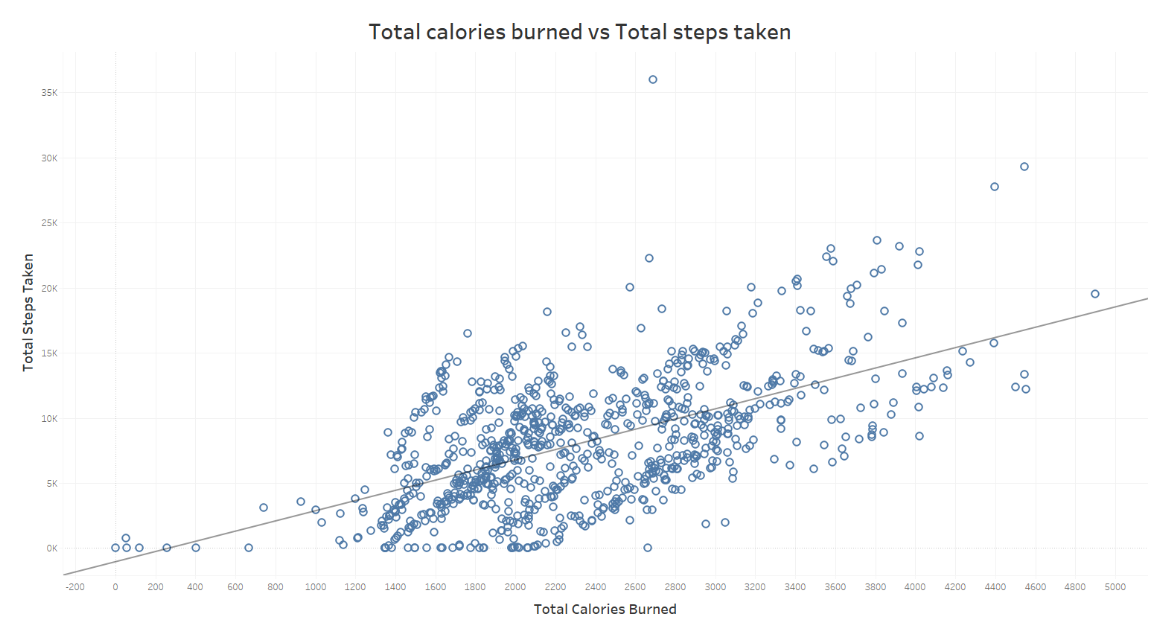   
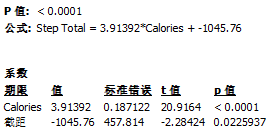   

**Interpretation**:    
**the R-square is 0.331313 and the p-value is less than 0.0001,    
which means there is postive correlation between total calories burned and total steps taken each day.**



# PART2     

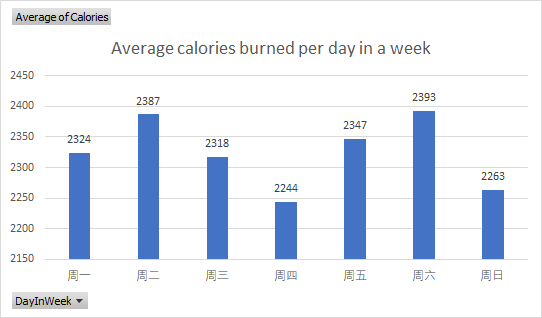   
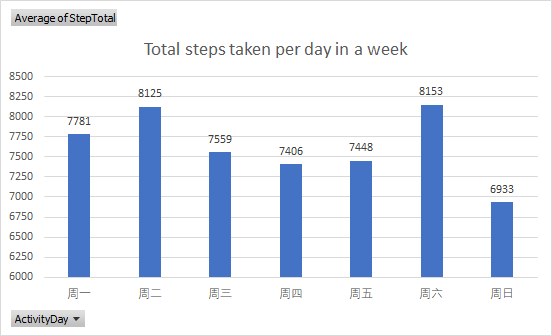   

**Interpretation**:   

As can be seen from above graphs, people tend to be more active and have higher metabolism on Tuesday and Saturday, with most steps taken and calories burned on Saturday.
However, people tend to be less active and have lower metabolism on Thursday and Sunday with the least average steps taken on Sunday.   
These results may attribute to a hypothesis that people tend to enjoy more outdoor activities like hanging out with friends and families after work on Friday as well as the first offical day off work(Saturday). But on Sunday, they need to have a complete rest and rejuvennate themselves before diving into work again on Monday next week. As a result, people tend to be less active on Sunday.    
After a enjoyable weekend, people could have more energy on working and doing sports, which can be seen from relatively more steps taken and calories burned on Monday and Tuesday. But as time goes by, their energy gradually depleted during the week as can be seen from the downward trend of both calories burned and steps taken from Tuesday to Thursday. Once hit Friday, people are ready for another turn of "recharge and discharge".  

# Study 2 analysis   

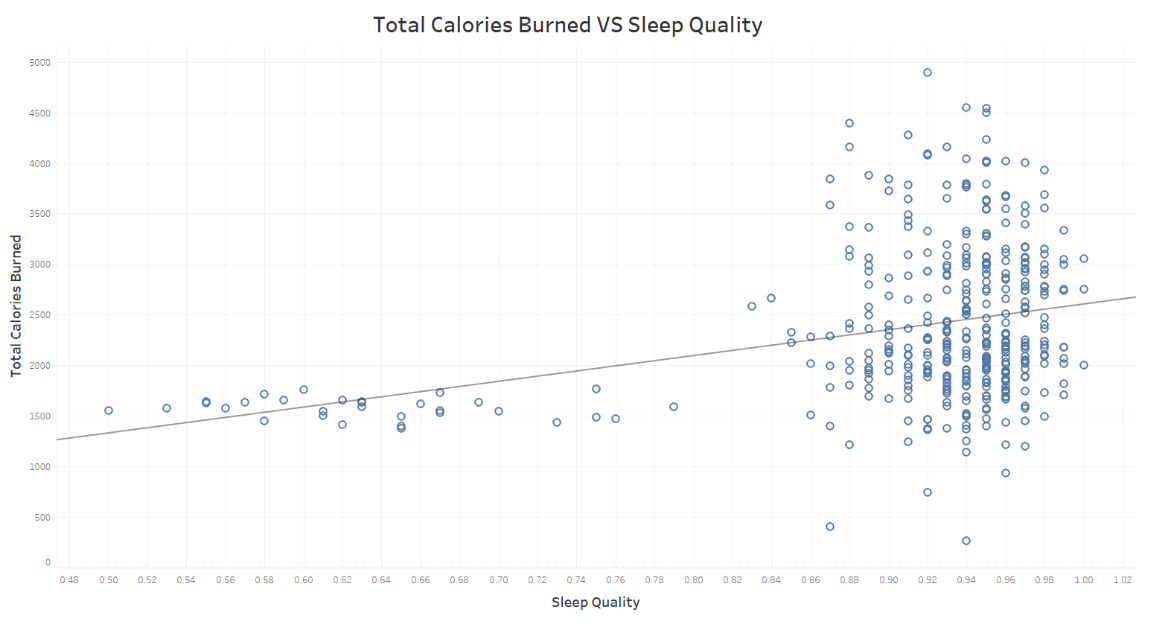   
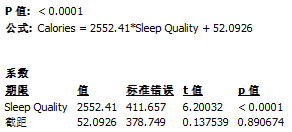  

**Interpretation**:   
**the R-square is 0.0874833 and the p-value is less than 0.0001,    
which means there is postive correlation between user's metabolism (total calories burned) and the sleep quality of each day.**   
**However, the value of R-sqare is not impressive and specific users may have unique sleeping behaviors (like sleep during the day), thus more data needed for a conclusive results.**

# Study 3 analysis   
**A very important commonsense and the premise of my later proposed hypothesis is fact that**:   

***People burn more calories when waking up than sleeping, and they also burn more calories when engaged in physical activities than being sedantary.***    

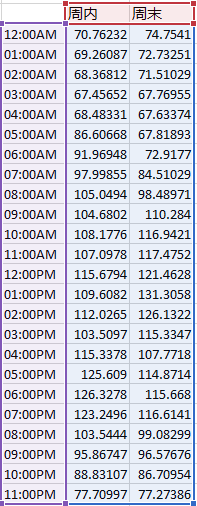
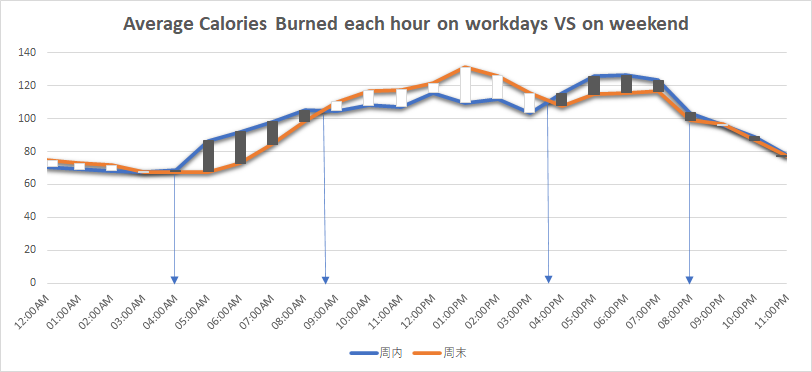   
  


**Interpretation**:   


The grapgh is splitted into **4 major parts** as indicated the arrows, they are **from 4am to 9am**, **from 9am to 4pm**, **from 4pm to 8pm**, and **from 8pm to 4am** in the next morning.    


We will dive into each time interval in more details and offer possible explanations for the discrepancies in calories burned during that period.    


**4am-9am**:    

> **phenomenon**: This is the first obvious discrepanies that one could observe, with average calories burned each hour on workdays higher than the weekend counterparts. But as time approaching 9am, the difference gradually disappears.    
> **hypothesis**: This may due to the fact that **people tend to wake up earier on workdays than on weekends** since they have to go to work. When the blue lines goes up steadily from 4am to 9am, means that more and more people are getting up and ready to dive into that day's work. In contrast, the orange line starts with no obvious changes but goes up with high speed starting from 6am and finally catches up the blue line by 9. This means that **although people tend to stay in bed longer on weekends, most of them still would be awake by 9 in the morning.**   


**9am-4pm**:    

> **phenomenon**: During this 7 hours, the average calories burned each hour on weekend are always higher than the workday counterparts. But as time approaching 4pm, the discrepancy falls as the blue line catch up and orange line goes down.    
> **hypothesis**: One possible explanation is that **when people do not have work, they can engage more physical activies like doing sports or hanging out with friends**, which increases their metabolism. Also, considering a lot of works nowadays are office works which are sedantary in nature, this could also explain why people burn less calories from 9am to 4pm on workdays.   
> The **1pm is the peak** for average calorie burned on weekends, thus we could assume that **people enjoy doing physical activities the most at around 1 to 2 pm on weekends.**       
> What's also worth noting is the downward trend of orange line from 1pm to 4:30pm. This phenomenon could attribute to a possibility that people are gradually getting tired and finishing their physical activities.   


**4pm-8pm**:    

> **phenomenon**: In this 4 hour window, the average calories burned each hour on workdays are higher than the weekend counterparts. But as time approaching 8pm, the discrepancy disappears as both the orange and blue line falls and finally overlaps.   
> **hypothesis**: In most western countries, **people finsh work and study by 4pm** is normal. Then they could **do some exercise or go out with friends and colleages**, which could explain the higher metabolism from 4pm to 7pm on workdays than weekends.   
> The downward trend for both blue and orange line from **7pm to 8pm** could be due to that people **gradually settle into a quiet and sedantary mode and are getting ready for sleep**.   


**8pm-4am**:    

> **phenomenon**: In this 8 hour window, there is no obvious difference between average calories burned each hour on workdays and on weekends. The blue and orange line almost completely overlaps.       
> **hypothesis**: After 8pm, **more and more people are getting into sleep on matter it's on workdays or on weekends**. Untill some of them start to wake up at 4am if it is workday.    

# Study 4 analysis    

**Findings**:   
Looking at the raw data in sleep_heart_rate.csv, the **"Id" column only show 5 distinct user Ids**, which may look strange since we have total 30 users for this study. But after examing the original data in heartrate_seconds_merged.csv, one would find out that this phenomenon was **due to the fact that most users' heart rate data was not recorded during their sleep time**. This could attribute to a possibility that most users tend to either **take their fitbit off or shut the device down before their sleep** and only have it back on when they are awake again.   
This is kind of understandable nowadays since you would hear people taking about the long term damage caused by radiation of electronic device like cell phone at their vicinity during their sleep. Actually just days ago, couple friends of mine shared their concern and told me to take electronic devices away from bed before sleep if I do not want cancer.    
**So, one main take away for companys make fitbit like smart devices is that, if sleep monitoring is one of your company's product functionality, be sure to do more research on radiation of smart devices and its impact on human body, either solve the problem or bust the myth so that sleep monitoring function could be fully untilized and benefit more people.**     



**Our goal is anomaly detection for heart rate at sleep, when strange values of heart rate during sleep could be a sign of potential cardivascular problems.     
In order to help our users to quickly discover the risk and pinpoint the problem, the results and data delivered to them must be personal and time-specific.**    

# User1:   

Let's take example of a user with user **ID 2347167796**.    
the user's **heart rate statistical summary**: **min=53.6, max=101.2, average=65.6, std=9.1**  
let's consider **values 3 standard deviations away from the mean as abnormality/outliers**. After applying this filter, we got the graph below documenting the occurance of outliers.   

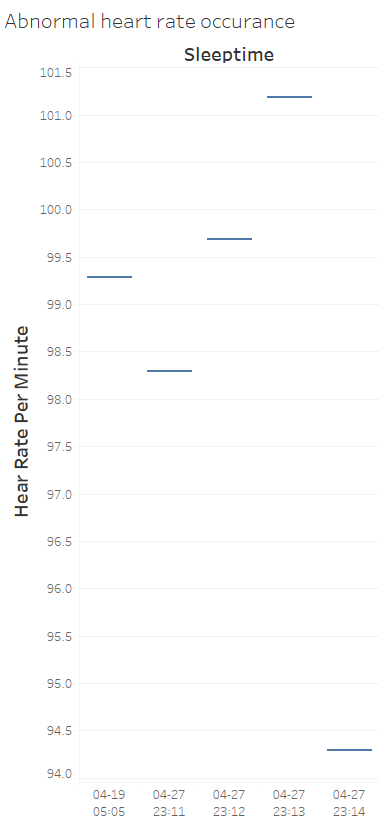    

**Interpretation**:   
As the graph depicted, a single high heart rate of 99 beats/minutes appeared on April 19th but didn't last over than 1 minute for it to be considered as serious, but a continously high abnormal heart rate during sleep was found **on April 27th from 23:11 to 23:14**, with **highest heart rate at 101.2 beats/minutes**. Thus, the user should recall what he did and happened at that day that time to make sure if it is heart issue or due to other reasons like a nightmare. If the whole heartrate elevaton process occured unconciously for the user, then he/she is **advised to go to hospital for further health check to eliminate the risk**.      



# User2:   

Another user with user **ID 4020332650**.    
the user's **heart rate statistical summary**: **min=47.8, max=138, average=65.5, std=13.0**  
let's consider **values 3 standard deviations away from the mean as abnormality/outliers**. After applying this filter, we got the graph below documenting the occurance of outliers.   

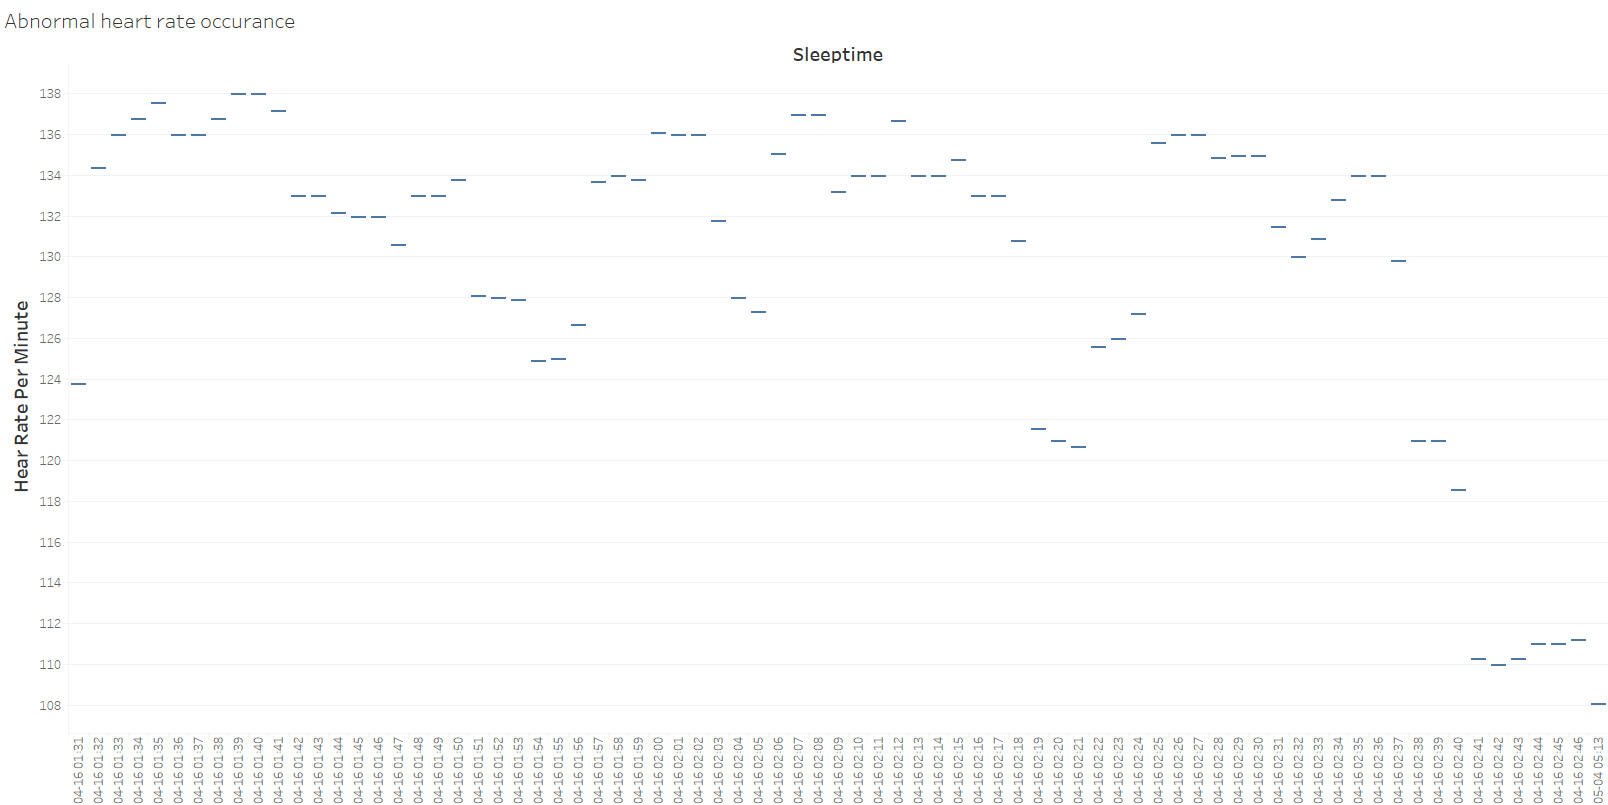     

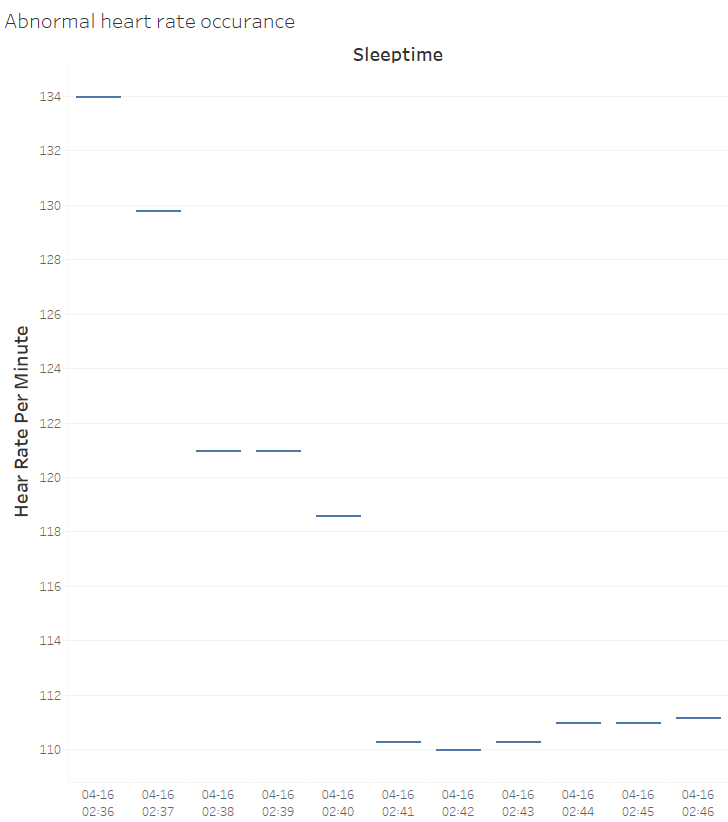    

   


**Interpretation**:   
According to the grapgh, **something serious happened on April 16th from 01:31 to 02:36** and that defintely require an explaination because even when doing exercises,**heart rate of a healthy person at rest should not elevate to that high (at around 130 to 140 beats/minutes)**. Then the heart rate is observed to **decrease from 134 to 104 from 02:36 to 02:47**. If the user him/herself can not define a reason for this abnormality, it is **highly suggested that this person should visit doctor as soon as possible for safety concerns**.      



# User3:   

Another user with user **ID 2347167796**.    
the user's **heart rate statistical summary**: **min=52, max=112.2, average=65.8, std=6.2**  
let's consider **values 3 standard deviations away from the mean as abnormality/outliers**. After applying this filter, we got the graph below documenting the occurance of outliers.   

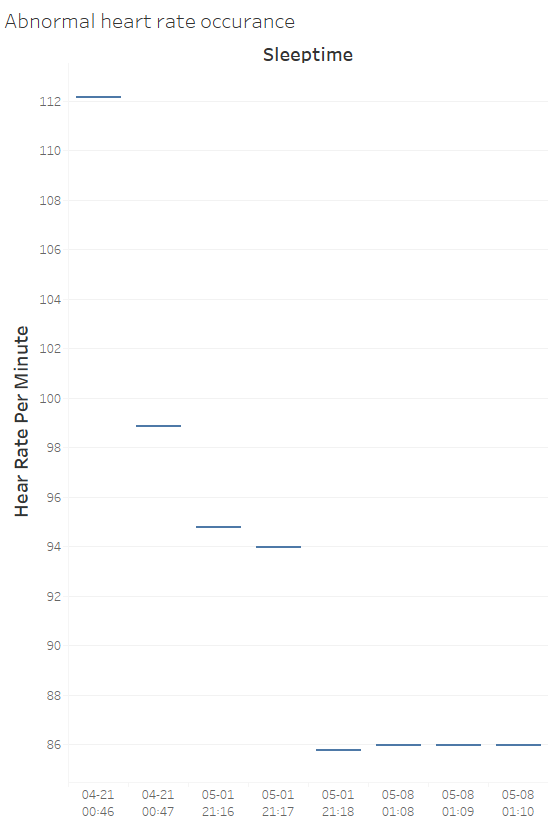      


**Interpretation**:   
According to the graph, one could tell this person is rather healthy with not many abnormalities in heart rate during sleep except for 2 minutes on April 21st and May 1st each and 3 minutes on May 8th.     

# SHARE & ACT  
**Goal**: focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.   

Summaries the goal to questions below:   

1. What are some trends in smart device usage?   
2. How could these trends apply to Bellabeat customers?   
3. How could these trends help influence Bellabeat marketing strategy?     

Bellabeat's products are especially designed for women -- from their design to their functions, while the dataset we laid our hands on is from general fitbit users and which the product itself only poessess some of the characteristic functions of a health smart device like monitoring sleep, heart rate, steps and calories. With obvious differences in user profile,  we could only partially understand our customer's usage of our products built on the premise that Bellabeats products also poessess the key features of a typical health smart device.    

**Be fully aware of only studying the general fitbit users' data offered on kaggle is a downplay of Bellabeats products' uniqueness and be willing to accept the fact that for most of the time through this case study we have to use assumptions to interpretate our results due to limited data**, this case study otherwise revealed some interesting patterns and behaviors of our subjects.    

**Belows are my findings along with some insights and pactical recommendations for Bellabeats company**:   
> 1. From study 1 part 1, we knew there is a **postive correlation between total calories burned and total steps taken each day**. To promote health and active level, the Bellabeats app could **send auto messages to its users about how many steps they took at the end of each day** and under user's consent, it could even **provide a ranking with friends who's also using the app** to make walking a bit more competitive and social-interactive (could reference a Chinese mobile app wechat).    
> From study 1 part 2, it shows us that **users tend to be less active on Sunday and with the least average steps taken**. A recommended strategy is that the Bellabeats company could **offer exclusive synchronised online group activities which are only free on Sunday** to encourage its users to be more physically active, such as free yoga/boxing classes led by streaming instructors.   
> 2. Study 2 shows that **a good quality sleep would have postive effect on a user's active level/metabolism at that day**. However, the value of **R-sqare is not impressive for us to settle a conclusion** and it is definitely **possible that the correlatioin of two variables are not linear** -- meaning the metabolism boost due to sleep quality decreases as sleep quality gradually approching 1. In general, **more data needed for a conclusive result**.   
> 3. Study 3 dives into discrepancies on active level measured by calorie burned per hour during 4 periods on a workday compared to on weekend: from 4am to 9am, from 9am to 4pm, from 4pm to 8pm, and from 8pm to 4am in the next morning. The detailed intepretations and assumptions are documented in "PROCESS & ANALYZE, Study 3 analysis". **The main take away for Bellabeats company is all about "the right timing"**. By that I mean **the time for sending meassages and notifications to its users**. In study 3 analysis, we made assumption that **people usually finish work or study at 4pm and finish exericses at around 7pm and ready for sleep at 8pm on workdays**. If these could be validated, Bellabeats **could send messages to promote a training program or simply remind the users to exercise at 4pm**. These messages should never be sent after 8pm cause most people would be asleep by then and it would be bad for the ads and views.   
> Also as we noticed, **people typically get up around 9am on weekends** and the **peak physical activity level on weekends appears around 1-2pm**. These are also the **great time for Bellabeats company to send recommendations and links to work-out sessions**.     
> 4. Study 4 is **anomaly detection of users' abnormal heartrates during their sleep**. The first obstacle is to **convince more people utilizing this function since only 5/30 people in our samples keep wearing fitbit during their sleep** so that heart rate at sleep could be monitored. Others did not do so for their considerations. And it's our job to **find out what are those considerations and either eliminate users' concerns or find other ways around**. In short, Bellabeats company should **sent out survey or questionaire** to ask if their users use the sleep monitoring function? and why or why not?   
> For users who's already using the sleep monitoring fucntions, the app should **provide users with daily reflection of yesterday's heart rate during sleep**, **pinpoint the abnormalities/outliers and give users guidance for self-check and suggest users to go to hospitals to secure help when necessary**. It could even **design a special feature for clients with known heart issues**, like when their **heart rates exceed certain threshold during their sleep**, **making noises to wake them and the family members up for immediate medication or call the ambulence**. 




# THIS IS THE END, THANK YOU 